In [1]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
try:
    # Establish a connection to the PostgreSQL database
    connection = pg.connect(
        dbname="enabl_crm",
        user="power_bi_user",
        password="with_power_comes_great_bi_001",
        host="192.168.250.32",
        port="5444"
    )
 
    # Define your SQL query with aliases for the columns
    query = """
   SELECT * from cases"""
 
    # Read data into a pandas DataFrame
    df_cases = pd.read_sql_query(query, connection)
 
    # Display the DataFrame
    print(df_cases)
 
except (Exception, pg.Error) as error:
    print("Error while connecting to PostgreSQL:", error)
 
finally:
    # Ensure the connection is closed properly
    if connection:
        connection.close()
        print("PostgreSQL connection is closed")

C:\Users\spad\AppData\Local\Temp\ipykernel_6776\644196666.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cases = pd.read_sql_query(query, connection)


         id  crm_number                                              title  \
0     11597       11597                                    Jnovtech Movers   
1      9274        9274                       Tech Writer Service solution   
2      9859        9859                           Documentation Consultant   
3      8383        8383                                 Project Management   
4      9453        9453    Push Sales -Process Engineer / Lean background    
...     ...         ...                                                ...   
8978  12436       12436                      ADT Sandbacka WF SG5X Finland   
8979  12344       12344                            Converter Test engineer   
8980  12437       12437                      Update of V90 Transport Frame   
8981  11248       11248  Stevanato Group_18535 Final Assembly_Operation...   
8982  12438       12438                                   Project Manager    

      contact_id  customer_id  sales_responsible_id  \
0       

In [4]:
df_cases.head()

,id,crm_number,title,contact_id,customer_id,sales_responsible_id,hour_approval_responsible_id,tender_manager_id,service_sales_manager_id,department_id,...,recruiter_id,nav_department_id,variation_of,quote_document,campaign_action_id,delivery_coordinates,production_coordinates,project_manager_id,after_sales_manager_id,agreement_by
0,11597,11597,Jnovtech Movers,976.0,382.0,NaN,17232.0,13285.0,NaN,3,...,NaN,111.0,NaN,None,NaN,None,None,NaN,None,NaN
1,9274,9274,Tech Writer Service solution,1296.0,439.0,16436.0,11742.0,NaN,NaN,1,...,NaN,NaN,NaN,None,NaN,None,None,NaN,None,NaN
2,9859,9859,Documentation Consultant,1851.0,14.0,168.0,11396.0,20059.0,NaN,1,...,NaN,NaN,NaN,None,NaN,None,None,NaN,None,NaN
3,8383,8383,Project Management,730.0,8.0,9866.0,25.0,NaN,NaN,1,...,NaN,NaN,NaN,None,NaN,None,None,NaN,None,NaN
4,9453,9453,Push Sales -Process Engineer / Lean background,1065.0,8.0,9869.0,NaN,20434.0,NaN,1,...,NaN,NaN,NaN,None,NaN,None,None,NaN,None,NaN


In [5]:
df_cases.shape

(8983, 104)

In [6]:
selected_columns = [
    "contact_id", "customer_id", "sales_responsible_id", "hour_approval_responsible_id", 
    "tender_manager_id", "service_sales_manager_id", "department_id", "case_phase_id", "case_status_id", 
    "case_lost_reason_id", "tender_status_id", "quote_status_id", "probability", "uses_po", "po_number", 
    "case_type_id", "extension_of", "related_to", "quote_sent_date", "project_type_id", "project_category_id", 
    "project_manager_id", "company_code_id", "nav_project_number", "nav_ic_number", "start_date", "end_date", 
    "request_deadline", "priority", "order_lost_date", "created_by", "updated_by", "contribution_margin", 
    "value_dkk", "value_weighted_dkk", "forecast_weighted_dkk"
]

# Ensure only existing columns are selected
df = df_cases[selected_columns]

In [7]:
df.shape

(8983, 36)

## EDA

In [8]:
print(df.isnull().sum())

contact_id                      1398
customer_id                        3
sales_responsible_id             615
hour_approval_responsible_id    4951
tender_manager_id               6055
service_sales_manager_id        8936
department_id                      0
case_phase_id                      0
case_status_id                     0
case_lost_reason_id             8133
tender_status_id                6083
quote_status_id                 6316
probability                        0
uses_po                         1045
po_number                       5619
case_type_id                       0
extension_of                    8242
related_to                      8878
quote_sent_date                 2833
project_type_id                    1
project_category_id              274
project_manager_id              8978
company_code_id                  584
nav_project_number              3534
nav_ic_number                   8983
start_date                      1263
end_date                        1287
r

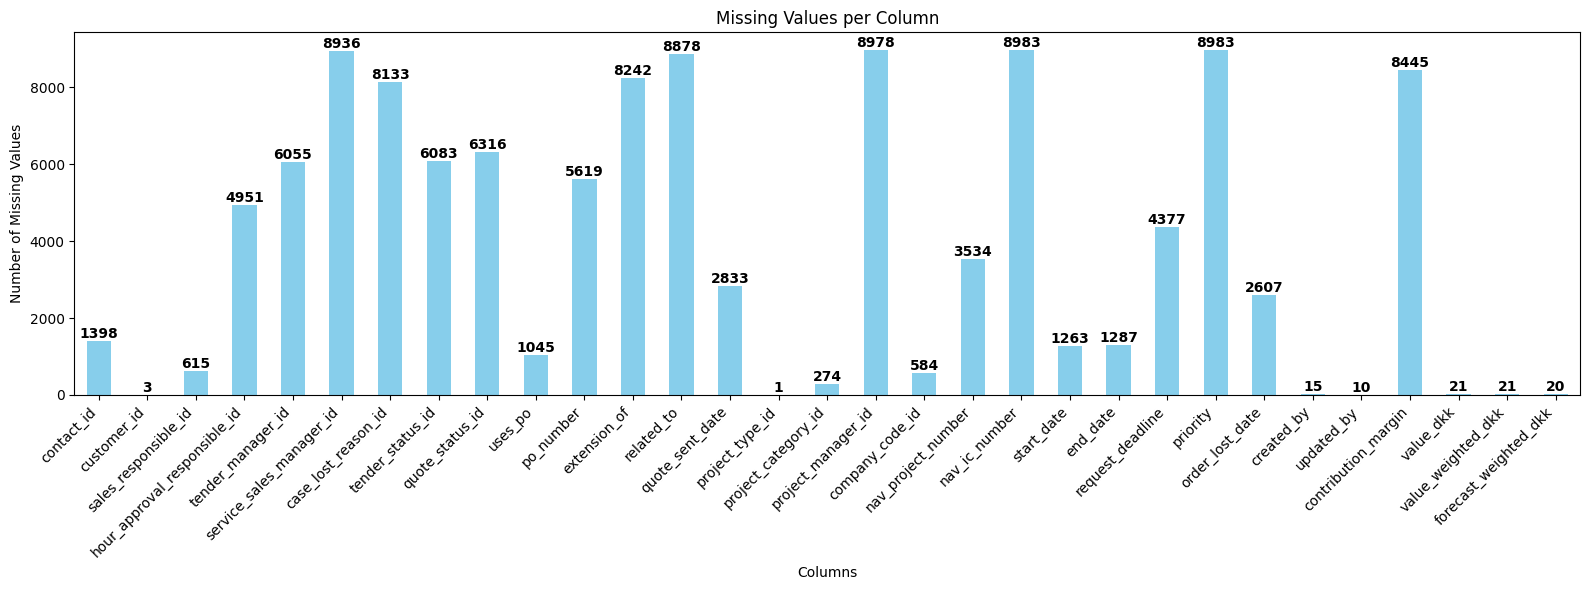

In [9]:
# Select only columns with missing values
df_missing = df[df.columns[df.isnull().any()]]

# Convert missing values count to a new DataFrame
df_null_counts = df_missing.isnull().sum().to_frame(name="missing_count")

# Plot missing values as a bar chart
fig, ax = plt.subplots(figsize=(16, 6))  # Increased figure size
df_null_counts.plot(kind='bar', legend=False, ax=ax, color="skyblue")

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",  # Convert float to int for clean display
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center-top
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Labels and title
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.title("Missing Values per Column")

# Rotate and wrap x-axis labels
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate labels to the right

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [10]:
# Set pandas options to display all columns without truncation
#pd.set_option('display.max_columns', None)  # Ensure all columns are shown
#pd.set_option('display.width', 1000)  # Set a wide output limit to accommodate more columns

# Get data types of all columns
dtypes = df.dtypes

# Count of null values for each column
null_counts = df.isnull().sum()

# Count of non-null values for each column
non_null_counts = df.notnull().sum()

# Combine all into a DataFrame for a better view
column_summary = pd.DataFrame({
    'Data Type': dtypes,
    'Null Values': null_counts,
    'Non-Null Values': non_null_counts
})

# Display the summary
column_summary

,Data Type,Null Values,Non-Null Values
contact_id,float64,1398,7585
customer_id,float64,3,8980
sales_responsible_id,float64,615,8368
hour_approval_responsible_id,float64,4951,4032
tender_manager_id,float64,6055,2928
service_sales_manager_id,float64,8936,47
department_id,int64,0,8983
case_phase_id,int64,0,8983
case_status_id,int64,0,8983
case_lost_reason_id,float64,8133,850


## Handling NULL VALUES & DTYPE & basic replacement

In [11]:
def clean_dataframe(df):

    # col with more null values
    df.drop(['priority','nav_ic_number','po_number'], axis=1, inplace=True)

    # Replace NaN with 0 and change dtype to int64 for specified columns
    cols_to_clean = [
        "contact_id", "customer_id", "sales_responsible_id", "hour_approval_responsible_id",
        "tender_manager_id", "service_sales_manager_id", "department_id", "case_phase_id", "case_status_id",
        "case_lost_reason_id", "tender_status_id", "quote_status_id", "case_type_id", "project_type_id", "project_category_id",
        "project_manager_id", "company_code_id", "extension_of", "related_to", "created_by", "updated_by", "contribution_margin",
        "value_dkk", "value_weighted_dkk", "forecast_weighted_dkk"
    ]
    
    # Replace NaN with 0 and convert columns to int64
    df[cols_to_clean] = df[cols_to_clean].fillna(0).astype('int64')

    # Convert the specified date columns to datetime format
    date_columns = ["quote_sent_date", "start_date", "end_date", "request_deadline", "order_lost_date"]
    df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

    # Extract alphabetic prefixes in 'nav_project_number' and replace specific values
    df['nav_project_number'] = df['nav_project_number'].str.extract(r'(^[A-Za-z]+)')
    df['nav_project_number'] = df['nav_project_number'].replace({
        'p': 'P',
        'PXXXXX': 'P',
        'PXXXXXX': 'P',
        'Internal': 'I'
    })

    # Remove rows where 'nav_project_number' has unwanted values
    df = df[~df['nav_project_number'].isin(['Intern', 'Needed', 'SO', 'ST', 'No', 'N'])]

    # Map 'uses_po' column
    #df['uses_po'] = df['uses_po'].map({True: 2, False: 1, None: 0})

    # Round specific columns and convert them to integers
    df[['value_dkk', 'value_weighted_dkk', 'forecast_weighted_dkk']] = df[['value_dkk', 'value_weighted_dkk', 'forecast_weighted_dkk']].round().astype(int)

    return df

# Example usage
df_cleaned = clean_dataframe(df)

C:\Users\spad\AppData\Local\Temp\ipykernel_6776\3350260625.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['priority','nav_ic_number','po_number'], axis=1, inplace=True)
C:\Users\spad\AppData\Local\Temp\ipykernel_6776\3350260625.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_clean] = df[cols_to_clean].fillna(0).astype('int64')
C:\Users\spad\AppData\Local\Temp\ipykernel_6776\3350260625.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [12]:
df_cleaned.head()

,contact_id,customer_id,sales_responsible_id,hour_approval_responsible_id,tender_manager_id,service_sales_manager_id,department_id,case_phase_id,case_status_id,case_lost_reason_id,...,start_date,end_date,request_deadline,order_lost_date,created_by,updated_by,contribution_margin,value_dkk,value_weighted_dkk,forecast_weighted_dkk
0,976,382,0,17232,13285,0,3,4,1,0,...,2025-08-29,2026-12-31,2025-04-30,NaT,17232,17232,0,0,0,0
1,1296,439,16436,11742,0,0,1,3,4,0,...,2023-10-01,2023-12-31,2023-06-20,2023-10-04,16436,12033,0,56930,56930,0
2,1851,14,168,11396,20059,0,1,2,3,5,...,2024-02-01,2024-06-30,2023-12-13,2024-01-14,168,168,0,302067,271860,0
3,730,8,9866,25,0,0,1,3,4,0,...,2023-08-01,2023-12-31,2023-06-19,2023-06-20,9866,19813,0,797508,797508,0
4,1065,8,9869,0,20434,0,1,1,3,1,...,2024-03-01,2024-09-30,2024-02-15,2023-12-17,9869,9869,0,708624,283449,0


In [13]:
# Set pandas options to display all columns without truncation
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)  # Set a wide output limit to accommodate more columns

# Get data types of all columns
dtypes = df_cleaned.dtypes

# Count of null values for each column
null_counts = df_cleaned.isnull().sum()

# Count of non-null values for each column
non_null_counts = df_cleaned.notnull().sum()

# Combine all into a DataFrame for a better view
column_summary = pd.DataFrame({
    'Data Type': dtypes,
    'Null Values': null_counts,
    'Non-Null Values': non_null_counts
})

# Display the summary
column_summary

,Data Type,Null Values,Non-Null Values
contact_id,int64,0,8938
customer_id,int64,0,8938
sales_responsible_id,int64,0,8938
hour_approval_responsible_id,int64,0,8938
tender_manager_id,int64,0,8938
service_sales_manager_id,int64,0,8938
department_id,int64,0,8938
case_phase_id,int64,0,8938
case_status_id,int64,0,8938
case_lost_reason_id,int64,0,8938


In [14]:
df_cleaned.shape

(8938, 33)

## Handling Categorical Features - one-hot encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

def encode_and_inspect_categorical_columns(df_cleaned, columns_to_encode=None):
    """
    This function performs the following steps:
    1. Selects categorical columns from the dataframe (if not provided).
    2. Prints the unique values for the specified categorical columns.
    3. Performs one-hot encoding on the specified categorical columns and returns the updated dataframe.

    Parameters:
    - df_cleaned (pd.DataFrame): The cleaned input dataframe.
    - columns_to_encode (list, optional): A list of column names to be one-hot encoded. If None, all categorical columns will be encoded.

    Returns:
    - pd.DataFrame: The updated dataframe with one-hot encoded columns.
    """
    # If no specific columns are provided, select categorical columns automatically
    if columns_to_encode is None:
        columns_to_encode = df_cleaned.select_dtypes(include=['object']).columns

    # Print unique values for each specified categorical column
    for column in columns_to_encode:
        unique_values = df_cleaned[column].unique()
        print(f"Unique values in '{column}':", unique_values)
    
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=int)

    # Loop through each column to be one-hot encoded
    for column in columns_to_encode:
        # One-hot encode the specified column
        encoded = encoder.fit_transform(df_cleaned[[column]])

        # Create column names for the encoded columns
        encoded_columns = encoder.get_feature_names_out(input_features=[column])

        # Add the one-hot encoded columns back to the dataframe
        encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=df_cleaned.index)

        # Drop the original column and concatenate the encoded columns
        df_cleaned = df_cleaned.drop(columns=[column])
        df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

    return df_cleaned

# Example usage
df_cleaned = encode_and_inspect_categorical_columns(df_cleaned, columns_to_encode=['uses_po', 'nav_project_number'])


Unique values in 'uses_po': [None True False]
Unique values in 'nav_project_number': ['P' nan 'I' 'IC']


In [16]:
df_cleaned.head()

,contact_id,customer_id,sales_responsible_id,hour_approval_responsible_id,tender_manager_id,service_sales_manager_id,department_id,case_phase_id,case_status_id,case_lost_reason_id,tender_status_id,quote_status_id,probability,case_type_id,extension_of,related_to,quote_sent_date,project_type_id,project_category_id,project_manager_id,company_code_id,start_date,end_date,request_deadline,order_lost_date,created_by,updated_by,contribution_margin,value_dkk,value_weighted_dkk,forecast_weighted_dkk,uses_po_False,uses_po_True,uses_po_None,nav_project_number_I,nav_project_number_IC,nav_project_number_P,nav_project_number_nan
0,976,382,0,17232,13285,0,3,4,1,0,4,0,70,7,0,0,NaT,51,23,0,1,2025-08-29,2026-12-31,2025-04-30,NaT,17232,17232,0,0,0,0,0,0,1,0,0,1,0
1,1296,439,16436,11742,0,0,1,3,4,0,0,3,100,3,8399,0,2023-10-04,4,1,0,2,2023-10-01,2023-12-31,2023-06-20,2023-10-04,16436,12033,0,56930,56930,0,0,1,0,0,0,1,0
2,1851,14,168,11396,20059,0,1,2,3,5,4,0,90,1,0,0,2024-01-10,5,1,0,1,2024-02-01,2024-06-30,2023-12-13,2024-01-14,168,168,0,302067,271860,0,0,0,1,0,0,0,1
3,730,8,9866,25,0,0,1,3,4,0,0,0,100,1,267,0,2023-06-20,5,1,0,1,2023-08-01,2023-12-31,2023-06-19,2023-06-20,9866,19813,0,797508,797508,0,0,1,0,0,0,1,0
4,1065,8,9869,0,20434,0,1,1,3,1,4,0,40,1,0,0,NaT,5,1,0,1,2024-03-01,2024-09-30,2024-02-15,2023-12-17,9869,9869,0,708624,283449,0,0,1,0,0,0,0,1


In [17]:
df_cleaned.shape

(8938, 38)

In [18]:
# Set pandas options to display all columns without truncation
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)  # Set a wide output limit to accommodate more columns

# Get data types of all columns
dtypes = df_cleaned.dtypes

# Count of null values for each column
null_counts = df_cleaned.isnull().sum()

# Count of non-null values for each column
non_null_counts = df_cleaned.notnull().sum()

# Combine all into a DataFrame for a better view
column_summary = pd.DataFrame({
    'Data Type': dtypes,
    'Null Values': null_counts,
    'Non-Null Values': non_null_counts
})

# Display the summary
column_summary

,Data Type,Null Values,Non-Null Values
contact_id,int64,0,8938
customer_id,int64,0,8938
sales_responsible_id,int64,0,8938
hour_approval_responsible_id,int64,0,8938
tender_manager_id,int64,0,8938
service_sales_manager_id,int64,0,8938
department_id,int64,0,8938
case_phase_id,int64,0,8938
case_status_id,int64,0,8938
case_lost_reason_id,int64,0,8938


## Convert Date Columns to Unix Timestamps

In [19]:
def convert_dates_to_unix(df, date_columns, placeholder_date="1900-01-01"):
    """
    Converts specified datetime columns to Unix timestamps (seconds since epoch).
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        date_columns (list): List of column names containing date values.
        placeholder_date (str): Date to replace NaN values (default: "0001-01-01").
    
    Returns:
        pd.DataFrame: DataFrame with converted date columns.
    """
    df_cleaned = df.copy()
    placeholder_date = pd.Timestamp(placeholder_date)  # Convert string to Timestamp
    
    for col in date_columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')  # Convert to datetime
        df_cleaned[col] = df_cleaned[col].fillna(placeholder_date)
        df_cleaned[col] = df_cleaned[col].astype('int64') // 10**9  # Convert to Unix timestamp
    
    return df_cleaned
# Load your dataset
df = df_cleaned  # Replace with actual file

# Define date columns
date_columns = ['quote_sent_date', 'start_date', 'end_date', 'request_deadline', 'order_lost_date']

# Apply transformation function
df_cleaned = convert_dates_to_unix(df, date_columns)

In [20]:
# Set pandas options to display all columns without truncation
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)  # Set a wide output limit to accommodate more columns

# Get data types of all columns
dtypes = df_cleaned.dtypes

# Count of null values for each column
null_counts = df_cleaned.isnull().sum()

# Count of non-null values for each column
non_null_counts = df_cleaned.notnull().sum()

# Combine all into a DataFrame for a better view
column_summary = pd.DataFrame({
    'Data Type': dtypes,
    'Null Values': null_counts,
    'Non-Null Values': non_null_counts
})

# Display the summary
column_summary

,Data Type,Null Values,Non-Null Values
contact_id,int64,0,8938
customer_id,int64,0,8938
sales_responsible_id,int64,0,8938
hour_approval_responsible_id,int64,0,8938
tender_manager_id,int64,0,8938
service_sales_manager_id,int64,0,8938
department_id,int64,0,8938
case_phase_id,int64,0,8938
case_status_id,int64,0,8938
case_lost_reason_id,int64,0,8938


In [21]:
df_cleaned.shape

(8938, 38)


## Target Class Distribution

1. Prospect
2. Lead
3. Tender
4. Quote
5. Agreement

In [22]:
df['case_phase_id'].value_counts()

case_phase_id
3    5086
1    1631
2    1147
5     613
4     461
Name: count, dtype: int64

<Axes: xlabel='case_phase_id'>

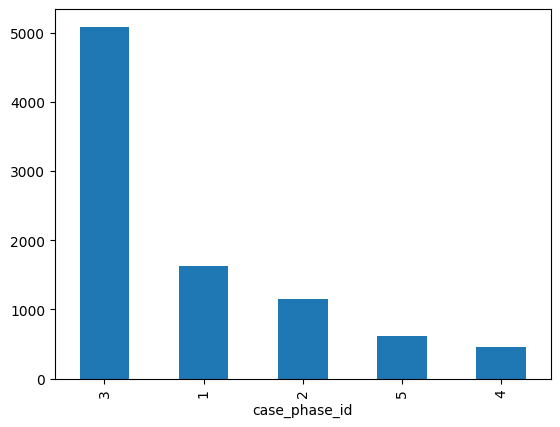

In [23]:
df['case_phase_id'].value_counts().plot(kind='bar')

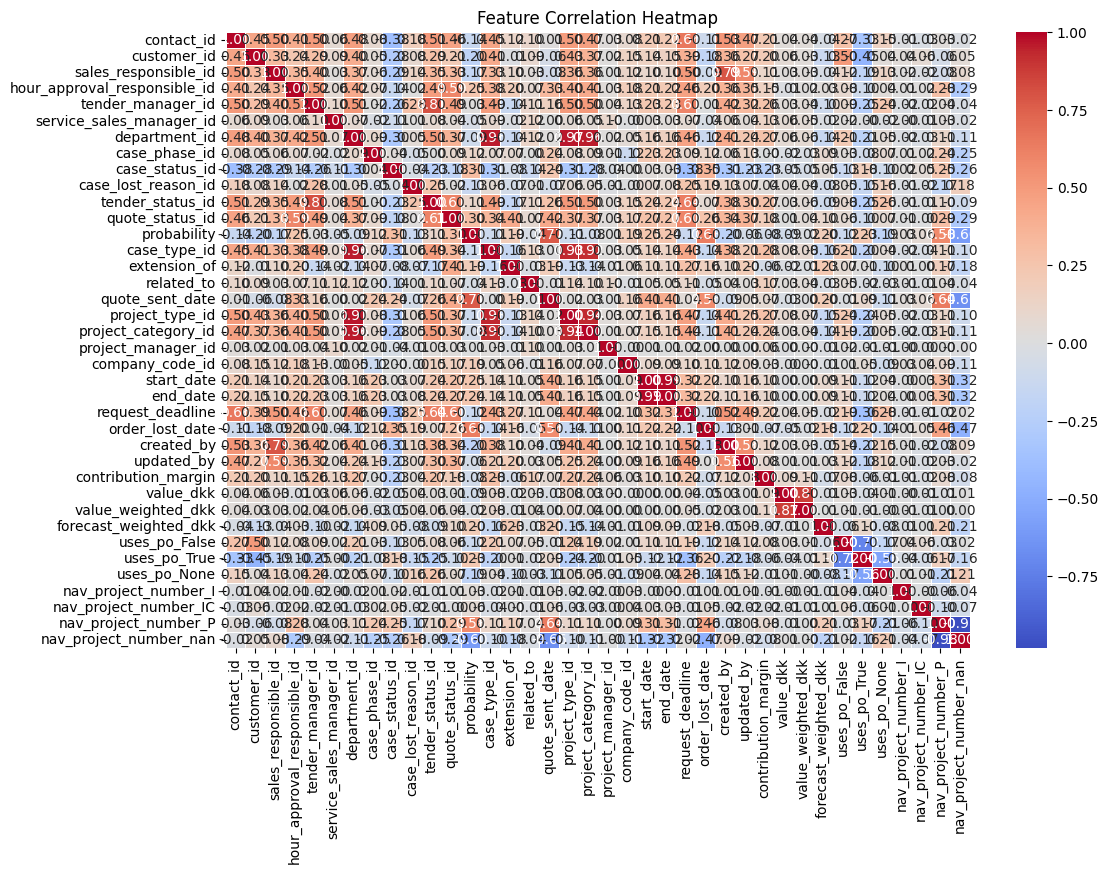

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


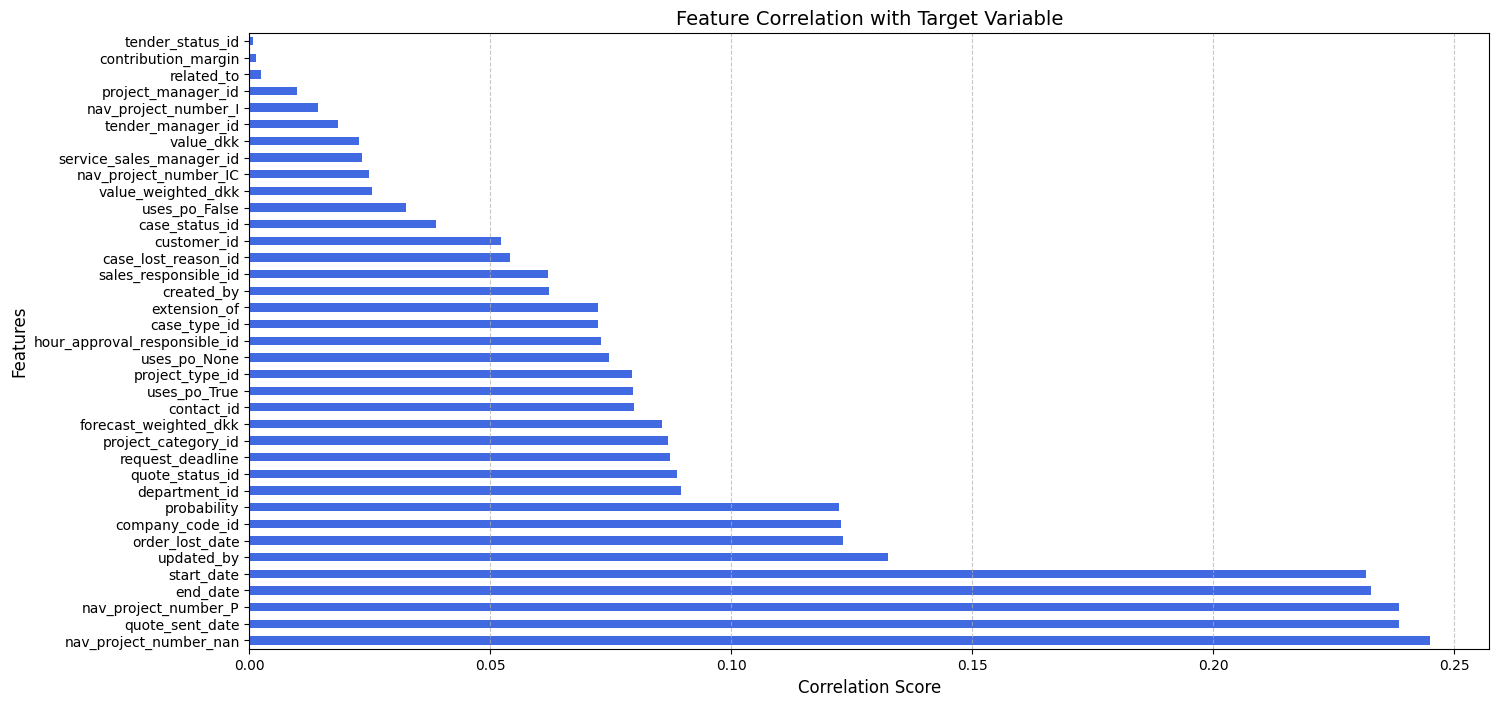

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlation with the target variable
target_corr = df_cleaned.corr()["case_phase_id"].drop("case_phase_id")

# Sort correlation values
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(16, 8))

# Plot horizontal bar chart for better visibility
target_corr_sorted.plot(kind="barh", color="royalblue")

# Improve readability
plt.title("Feature Correlation with Target Variable", fontsize=14)
plt.xlabel("Correlation Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(fontsize=10)  # Adjust y-axis font size
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


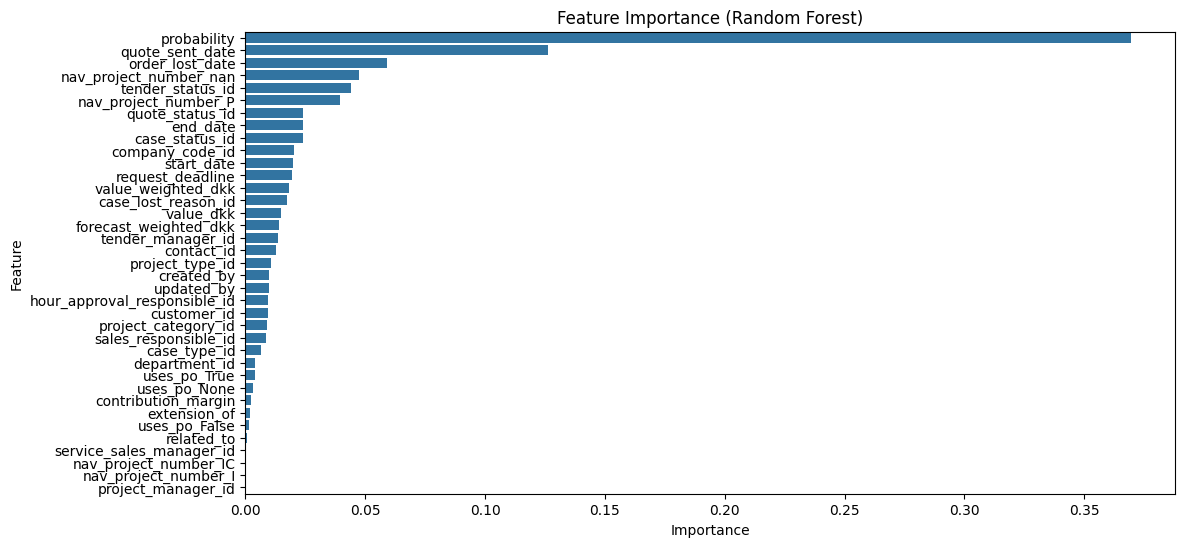

Selected Features: ['probability', 'quote_sent_date', 'order_lost_date', 'nav_project_number_nan', 'tender_status_id', 'nav_project_number_P', 'quote_status_id', 'end_date', 'case_status_id', 'company_code_id', 'start_date', 'request_deadline', 'value_weighted_dkk', 'case_lost_reason_id', 'value_dkk', 'forecast_weighted_dkk', 'tender_manager_id', 'contact_id', 'project_type_id', 'created_by']


In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train a simple Random Forest model
X = df_cleaned.drop(columns=['case_phase_id'])
y = df_cleaned['case_phase_id']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Select the top N important features (e.g., top 10)
selected_features = feature_importance.head(20)['Feature'].tolist()
print("Selected Features:", selected_features)



## Data Splitting

In [27]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['case_phase_id'])
y = df_cleaned['case_phase_id']

In [28]:
X.shape

(8938, 37)

In [29]:
y.shape

(8938,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and test sets
X = df_cleaned.drop(columns=['case_phase_id'])
y = df_cleaned['case_phase_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models for multi-class classification
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"Support Vector Machine (SVM)": SVC(kernel='linear', decision_function_shape='ovr'),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis()
}

# Iterate through models, train, predict, and print classification report
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- Logistic Regression ---


c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.93      0.67       305
           2       0.69      0.28      0.40       252
           3       0.91      1.00      0.95      1027
           4       0.23      0.03      0.06        91
           5       0.00      0.00      0.00       113

    accuracy                           0.77      1788
   macro avg       0.47      0.45      0.41      1788
weighted avg       0.72      0.77      0.72      1788


--- Decision Tree ---
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.95      0.94       305
           2       0.95      0.92      0.93       252
           3       0.99      1.00      1.00      1027
           4       0.88      0.93      0.90        91
           5       0.96      0.89      0.93       113

    accuracy                           0.97      1788
   macro avg       0.94      0

## Model with Selected Features

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define selected top 20 features from feature importance analysis
selected_features = [
    'probability', 'quote_sent_date', 'nav_project_number_nan', 'order_lost_date', 
    'nav_project_number_P', 'tender_status_id', 'company_code_id', 'case_status_id', 
    'end_date', 'start_date', 'case_lost_reason_id', 'quote_status_id', 'request_deadline', 
    'value_weighted_dkk', 'value_dkk', 'contact_id', 'tender_manager_id', 
    'forecast_weighted_dkk', 'project_type_id', 'hour_approval_responsible_id'
]

# Filter the dataset using selected features
X = df_cleaned[selected_features]
y = df_cleaned['case_phase_id']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models for multi-class classification
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis()
}

# Iterate through models, train, predict, and print classification report
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- Logistic Regression ---
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.93      0.67       305
           2       0.69      0.28      0.40       252
           3       0.91      1.00      0.95      1027
           4       0.23      0.03      0.06        91
           5       0.00      0.00      0.00       113

    accuracy                           0.77      1788
   macro avg       0.47      0.45      0.41      1788
weighted avg       0.72      0.77      0.72      1788


--- Decision Tree ---
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.95      0.94       305
           2       0.94      0.94      0.94       252
           3       1.00      1.00      1.00      1027
           4       0.89      0.91      0.90        91
           5       0.96      0.90      0.93       113

    accuracy                           0.97      1788
 

c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\spad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.96      0.96       305
           2       0.96      0.96      0.96       252
           3       1.00      1.00      1.00      1027
           4       0.96      0.97      0.96        91
           5       0.98      0.93      0.95       113

    accuracy                           0.98      1788
   macro avg       0.97      0.96      0.97      1788
weighted avg       0.98      0.98      0.98      1788


--- Naive Bayes ---
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.19      0.28       305
           2       0.47      0.35      0.40       252
           3       0.91      0.95      0.93      1027
           4       0.39      0.33      0.36        91
           5       0.27      0.83      0.41       113

    accuracy                           0.70      1788
   macro avg       0.52      0.5

In [ ]:
selected_features

['probability',
 'quote_sent_date',
 'nav_project_number_nan',
 'order_lost_date',
 'nav_project_number_P',
 'tender_status_id',
 'company_code_id',
 'case_status_id',
 'end_date',
 'start_date',
 'case_lost_reason_id',
 'quote_status_id',
 'request_deadline',
 'value_weighted_dkk',
 'value_dkk',
 'contact_id',
 'tender_manager_id',
 'forecast_weighted_dkk',
 'project_type_id',
 'hour_approval_responsible_id']

In [1]:
X.head(5)

NameError: name 'X' is not defined

Index(['probability', 'quote_sent_date', 'nav_project_number_nan', 'order_lost_date', 'nav_project_number_P', 'tender_status_id', 'company_code_id', 'case_status_id', 'end_date', 'start_date', 'case_lost_reason_id', 'quote_status_id', 'request_deadline', 'value_weighted_dkk', 'value_dkk', 'contact_id', 'tender_manager_id', 'forecast_weighted_dkk', 'project_type_id', 'hour_approval_responsible_id'], dtype='object')